NAME    : RAJASREE S
    
ROLL NO : 215229147

CLASS   : I M.Sc DATA SCIENCE

# NLP WITH DISASTER TWEETS

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import re
import string
import warnings
warnings.filterwarnings("ignore")

# LOAD DATASET

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [42]:
test_data = pd.read_csv('test.csv')
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


# EXPLORE DATASET

In [4]:
train_data.shape

(7613, 5)

In [5]:
train_data.size

38065

In [7]:
train_data.iloc[0]

id                                                          1
keyword                                                   NaN
location                                                  NaN
text        Our Deeds are the Reason of this #earthquake M...
target                                                      1
Name: 0, dtype: object

In [8]:
train_data.iloc[0:5,4]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
train_data['target']

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [15]:
train_data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [16]:
train_data.describe(include = 'object')

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


In [17]:
train_data.describe(include = 'all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [18]:
train_data.mean()

id        5441.934848
target       0.429660
dtype: float64

In [20]:
train_data.target.unique()

array([1, 0], dtype=int64)

In [22]:
train_data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [23]:
train_data.sort_values(by = 'target').head()

,id,keyword,location,text,target
3806,5408,fire%20truck,NaN,Former Township fire truck being used in Phili...,0
3444,4922,exploded,USA,The Dress Memes Have Officially Exploded On Th...,0
3443,4920,exploded,"Elmwood Park, NJ",Well as I was chaning an iPad screen it fuckin...,0
6219,8875,smoke,3.28.15|7.20.15|7.25.15,So does Austin smoke too since he agreed to th...,0
3440,4917,exploded,NaN,Im Dead!!! My two Loves in 1 photo! My Heart e...,0


In [24]:
train_data.sort_values(by = 'id', ascending = False).head()

,id,keyword,location,text,target
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


In [25]:
train_data.rename(columns = {'keyword': 'keywords!!!'},inplace = True)

# PREPROCESING

In [26]:
train_data

,id,keywords!!!,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [27]:
train_data.columns

Index(['id', 'keywords!!!', 'location', 'text', 'target'], dtype='object')

In [28]:
train_data.isna()

,id,keywords!!!,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [29]:
train_data.isnull()

,id,keywords!!!,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [30]:
train_data.isnull().sum()

id                0
keywords!!!      61
location       2533
text              0
target            0
dtype: int64

In [34]:
train_data.location.fillna('unknown', inplace = True)

In [35]:
train_data

,id,keywords!!!,location,text,target
0,1,NaN,unknown,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,unknown,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,unknown,All residents asked to 'shelter in place' are ...,1
3,6,NaN,unknown,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,unknown,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,unknown,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,unknown,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,unknown,Police investigating after an e-bike collided ...,1


In [43]:
!pip install nltk

In [44]:
# TOKENIZATION

import nltk
from nltk import TweetTokenizer

tokenizer = TweetTokenizer()

train_data['tokens'] = [tokenizer.tokenize(item) for item in train_data.text]
test_data['tokens'] = [tokenizer.tokenize(item) for item in test_data.text]

In [45]:
# VECTORIZATION

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


X = vectorizer.fit_transform(train_data.text).toarray()
y = train_data['target']

# VISUALIZE THE TWEETS

<AxesSubplot:xlabel='count', ylabel='target'>

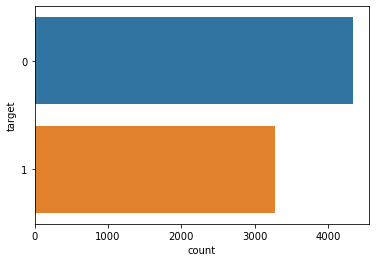

In [36]:
sns.countplot (y = 'target', data =train_data)

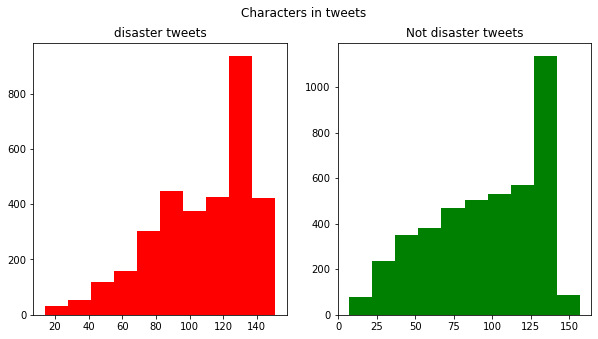

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_data[train_data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

# MODEL DATA SPLITING

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# LOGISTIC REGRESSION

In [47]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model 
log = LogisticRegression(random_state = 0)

# Fitting data
log.fit(X_train, y_train)

# Predicting the data
log_pred = log.predict(X_test)

# MODEL EVALUATION

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Classification Report
clf_report = classification_report(y_test,log_pred)
print("\nCLASSIFICATION REPORT:\n", clf_report)


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1338
           1       0.80      0.72      0.76       946

    accuracy                           0.81      2284
   macro avg       0.81      0.80      0.80      2284
weighted avg       0.81      0.81      0.81      2284



# CONFUSION MATRIX


CONFUSION MATRIX:


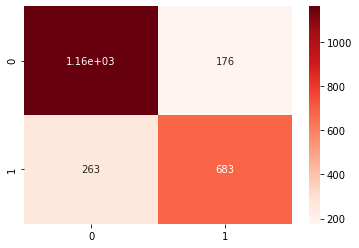

In [54]:
# Confusion Matrix
print("\nCONFUSION MATRIX:")
sns.heatmap(confusion_matrix(y_test,log_pred),annot=True, cmap='Reds', fmt='.3g')
plt.show()